In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# App dataset cleanup

# Not dropping rows with null values as it results in key errors later on
# For analysis, ignore the rows with Rating = -1, Size = 0 and Installs = -1 instead of dropping them
values = {"Rating":-1, "Reviews":"-1", "Size":"0", "Installs":"-1", "Content Rating": "Not Rated", "Genres": "Not Assigned", "Last Updated": "No Date"}
df = df.fillna(value = values)
df = df.drop(columns=['Current Ver', 'Android Ver'])

In [6]:
# Cleaning up df further to make visualizations easier

# Fixing up a data point
df.loc[10472,"App"] = "Life Made WI-Fi Touchscreen Photo Frame"
df.loc[10472,"Category"] = "PERSONALIZATION"
df.loc[10472,"Rating"] = "1.9"
df.loc[10472,"Reviews"] = "19"
df.loc[10472,"Size"] = "3M"
df.loc[10472,"Installs"] = "1000+"
df.loc[10472,"Type"] = "Free"
df.loc[10472,"Price"] = "0.0"
df.loc[10472,"Content Rating"] = "Everyone"
df.loc[10472,"Genres"] = "Personalization"
df.loc[10472,"Last Updated"] = "February 11, 2018"

# Coverting Rating to a float value
# Recall: Null values are assigned a float value of -1
for i in range(len(df["Rating"])):
    df["Rating"].values[i] = float(df["Rating"].values[i])
    
# Converting Reviews to a float value
# Recall: Null values are assigned a float value of -1
for i in range(len(df["Reviews"])):
    df["Reviews"].values[i] = float(df["Reviews"].values[i].replace("M","000000"))
    
# Removing letters at the end of size of each app and coverting the size to a float value
# Recall: Null values are assigned a float value of 0
# Apps whose size vary with the device are assigned a value of -1
# Size of app is in Megabytes
for i in range(len(df["Size"])):
    df["Size"].values[i] = df["Size"].values[i].replace("M","000000")
    df["Size"].values[i] = df["Size"].values[i].replace("k","000")
    x = df["Size"].values[i]
    if(x.isdigit()==True):
        df["Size"].values[i] = float(x)/1000000
    else:
        df["Size"].values[i] = -1
    

# Removing the + at the end of number of installs and converting this value to a float
# Recall: Null values are assigned a value of -1
for i in range(len(df["Installs"])):
    x = df["Installs"].values[i]
    l = len(x)-1
    df["Installs"].values[i] = df["Installs"].values[i][:l].replace(",","")
    if(x.isdigit()==True):
        df["Installs"].values[i] = float(x)
        
# Removing the $ sign in front of the price and converting this value to a float
for i in range(len(df["Price"])):
    df["Price"].values[i] = float(df["Price"].values[i].replace("$",""))
    
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,-1,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,-1,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,-1,50000,Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,-1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In [7]:
# Finding out number of apps per category 
v1 = pd.DataFrame(columns = ['Category','Number of Apps'])
v1['Number of Apps'] = df['Category'].value_counts()
v1['Category'] = v1['Number of Apps'].keys()
v1.set_index('Category')

total = v1['Number of Apps'].sum()

max_c = v1['Category'][0]
max_no = v1['Number of Apps'][0]
print("The category "+max_c+" has the largest number of apps with "+str(max_no/total*100)+" % of total scraped apps.")

min_c = v1['Category'][-1]
min_no = v1['Number of Apps'][-1]
print("The category "+min_c+" has the largest number of apps with "+str(min_no/total*100)+" % of total scraped apps.")

The category FAMILY has the largest number of apps with 18.190203855732868 % of total scraped apps.
The category BEAUTY has the largest number of apps with 0.48888478922608614 % of total scraped apps.


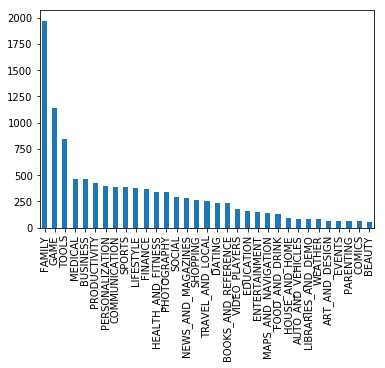

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plot1 = df['Category'].value_counts().plot(kind='bar')

In [9]:
# From the above data, we can see the most developers make apps belonging to the categories of 
# FAMILY, GAME and TOOLS, so these categories have more competition.

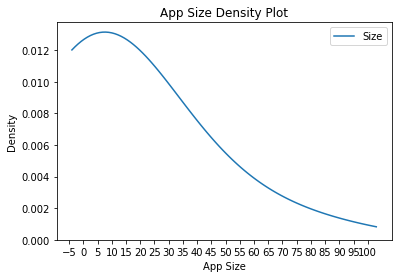

In [10]:
# Finding out a distribution of app sizes from the scrapped apps
import seaborn as sns
plt.subplot()
sns.kdeplot(df['Size'], bw=1)

plt.title ('App Size Density Plot')
plt.xlabel('App Size')
plt.xticks(np.arange(-5, 105, step=5))
plt.ylabel('Density')

plt.show()

In [11]:
# From the above graph, we see a huge peak around where app size is -1. From our data clean up, this means
# that either the app has different sizes depending on the device it is installed on, (size is 
# -1) or that that there was no value of the app size in the dataset (0). Hence, most of the apps that were scraped had different sizes depending on the 
# device. But unfortunately, this does not give us a target for the size of a working app,
# which may be useful to programmers.

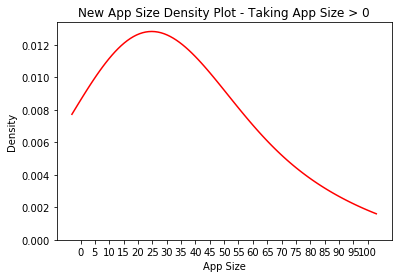

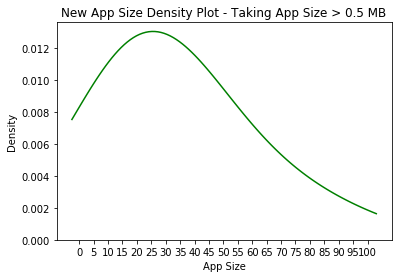

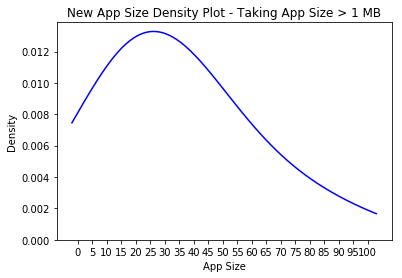

In [12]:
plt.subplot()

new_data = []
for x in df['Size']:
    if(x > 0):
        new_data.append(x)
        
sns.kdeplot(new_data, bw=1, color = 'red')

plt.title ('New App Size Density Plot - Taking App Size > 0')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()

plt.subplot()

new_data = []
for x in df['Size']:
    if(x > 0.5):
        new_data.append(x)
        
sns.kdeplot(new_data, bw=1, color = 'green')

plt.title ('New App Size Density Plot - Taking App Size > 0.5 MB')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()

plt.subplot()
new_data = []
for x in df['Size']:
    if(x > 1):
        new_data.append(x)

sns.kdeplot(new_data, bw=1, color = 'blue')

plt.title ('New App Size Density Plot - Taking App Size > 1 MB')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()


In [13]:
# In order to get more information about the sizes of the apps on the Google Play Store, we 
# filter the apps by specifying a minimum app size. When we take app size > 0, in order 
# negate the influence of the data points that could skew the density plot (as discussed above),
# we find that there is still a peak around app size 0, but this is much smaller than the old plot. 
# Thus, in order to find out how many apps are truly greater than size 0, we increase the minimum app
# size to 0.5 MB then to 1 MB. As we do this, we see that the peak disappears, which means that
# there are very few apps with size < 1 MB. So we can ignore this peak.

# All the density plots show the highest peak at an app size of around 10 to 15 MB, with most 
# of the apps being in the range 5 to 40 MB. So, as a developer, a target app size would probably
# be between 10 to 15 MB.

In [14]:
# Encoding data to get numeric columns and plot a correlation matrix

new_df = df.drop(columns = ['App', 'Genres', 'Last Updated'])
new_df["Category"] = new_df["Category"].astype('category').cat.codes
new_df["Rating"] = new_df["Rating"].astype('category').cat.codes
new_df["Reviews"] = new_df["Reviews"].astype('category').cat.codes
new_df["Size"] = new_df["Size"].astype('category').cat.codes
new_df["Installs"] = new_df["Installs"].astype('category').cat.codes
new_df["Type"] = new_df["Type"].astype('category').cat.codes
new_df["Price"] = new_df["Price"].astype('category').cat.codes
new_df["Content Rating"] = new_df["Content Rating"].astype('category').cat.codes

corr1 = new_df.corr()
corr1.style.background_gradient(cmap='inferno')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
Category,1,0.00719016,0.0483158,-0.111143,0.0267619,0.0184016,-0.000873671,-0.0931542
Rating,0.00719016,1,0.433201,0.0430812,0.245464,-0.0258771,-0.0155108,0.060501
Reviews,0.0483158,0.433201,1,0.0789516,0.361866,-0.177005,-0.135424,0.169714
Size,-0.111143,0.0430812,0.0789516,1,0.0257805,-0.00511204,-0.00348603,0.105077
Installs,0.0267619,0.245464,0.361866,0.0257805,1,-0.121542,-0.102843,0.0627481
Type,0.0184016,-0.0258771,-0.177005,-0.00511204,-0.121542,1,0.780367,-0.0502975
Price,-0.000873671,-0.0155108,-0.135424,-0.00348603,-0.102843,0.780367,1,-0.0329137
Content Rating,-0.0931542,0.060501,0.169714,0.105077,0.0627481,-0.0502975,-0.0329137,1


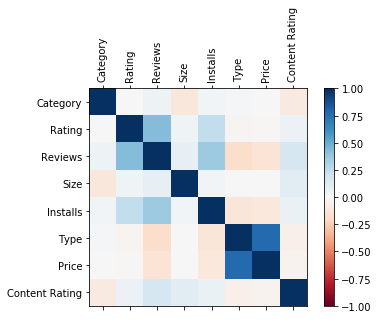

In [15]:
corr = new_df.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

In [16]:
# From the correlational matrix, we see that the price and type of app have highly correlated,
# which is to be expected, since the type of app is either Free or Paid. The rating of the app
# has a high correlation with the number of reviews of the app as well as the number of times 
# it was installed. Also, the content rating has a mildly positive correlation with the number 
# of reviews, size of the app, number of installs and the rating of the app in decreasing order.

# If we were to create a model that would predict the rating of the app, the number of installs
# and the numbers of reviews of the app would be two main features that we would consider as 
# inputs.

In [ ]:
# User reviews
df_reviews = pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv")
df_reviews.head()

In [29]:
df_reviews = df_reviews.dropna(subset=['Translated_Review'])
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


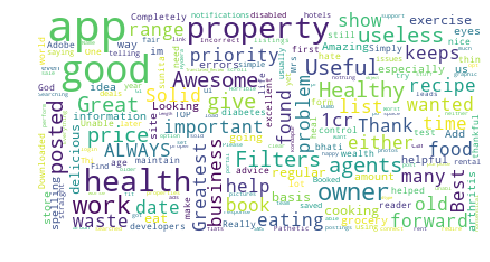

In [30]:
# Word cloud of all user reviews

import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_reviews['Translated_Review']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [92]:
### ===========
#     MODELS
### ===========

In [93]:
# Change 'Category' into integer values to process it
category_array = df["Category"].unique()
category_dict = dict(zip(category_array, range(len(category_array))))
df = df.replace(category_dict)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,0,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510.0,-1.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,0,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,-1.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [94]:
category_array

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [95]:
# Change Installs from string to integer
df['Installs'] = pd.to_numeric(df['Installs'])

# Drop rows with Rating < 0, Size <= 0, Installs < 0
df = df[df.Rating >= 0]
df = df[df.Size > 0]
df = df[df.Installs >= 0]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,0,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
3,Sketch - Draw & Paint,0,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018"
6,Smoke Effect Photo Maker - Smoke Editor,0,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,0,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018"


In [170]:
# Linear Regression
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['Category', 'Reviews', 'Size', 'Installs', 'Price']]
y = df['Rating']
# y = np.asarray(df['Rating'], dtype="|S6")

In [97]:
x.describe()

,Category,Reviews,Size,Installs,Price
count,4832.000000,4.832000e+03,4832.000000,4.832000e+03,4832.000000
mean,17.411010,4.488072e+05,33.734030,1.249607e+07,0.714737
std,6.526759,2.337048e+06,23.788733,6.281273e+07,11.776329
min,0.000000,1.000000e+00,0.011000,1.000000e+00,0.000000
25%,16.000000,2.597500e+02,16.000000,1.000000e+04,0.000000
50%,18.000000,7.582000e+03,26.000000,5.000000e+05,0.000000
75%,21.000000,8.328600e+04,46.000000,5.000000e+06,0.000000
max,32.000000,4.489389e+07,100.000000,1.000000e+09,399.990000


In [98]:
reg_model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
# weights for each coefficient: 'Category', 'Reviews', 'Size', 'Installs', 'Price'
reg_weights_df = pd.DataFrame()
reg_weights_df['Feature'] = ['Category', 'Reviews', 'Size', 'Installs', 'Price']
reg_weights_df['Weight'] = reg_model.coef_
reg_weights_df

,Feature,Weight
0,Category,-3.237571e-03
1,Reviews,1.720427e-08
2,Size,1.560683e-03
3,Installs,7.515221e-12
4,Price,-4.408768e-04


In [100]:
# Comparing actual and predicted values
reg_df = pd.DataFrame()
reg_df['Actual Value'] = y_test
reg_pred = reg_model.predict(x_test)
reg_df['Predicted Value'] = reg_pred
reg_df.head()

,Actual Value,Predicted Value
2982,4.6,4.150159
10500,3.7,4.134619
4978,4.4,4.143706
5652,3.9,4.177718
6009,3.3,4.207320


In [101]:
# Root mean square error
np.sqrt(np.mean((reg_pred-y_test)**2))

0.5110592288525357

In [102]:
print("Training set score: %f" % reg_model.score(x_train, y_train))
print("Test set score: %f" % reg_model.score(x_test, y_test))

Training set score: 0.016863
Test set score: 0.015844


In [103]:
# Find the median rating for each category
category_df = pd.DataFrame()
category_ids = df["Category"].unique()
category_df["Category"] = category_ids
category_df["Median Rating"] = ""
median_rating = []
for i in range(category_ids.size):
    single_cate = df.loc[df['Category'] == i]
    median_rating.append(single_cate['Rating'].median())
category_df['Median Rating'] = median_rating
category_df

,Category,Median Rating
0,0,4.40
1,1,4.20
2,2,4.30
3,3,4.50
4,4,4.30
5,5,4.20
6,6,4.20
7,7,4.10
8,8,4.40
9,9,4.20


In [104]:
# Sort by descending median rating to find the top 15 categories
top_15 = category_df[['Category', 'Median Rating']].sort_values(['Median Rating'], ascending=False).head(15)
top_15

,Category,Median Rating
10,10,4.60
3,3,4.50
13,13,4.50
0,0,4.40
19,19,4.40
29,29,4.40
28,28,4.40
8,8,4.40
26,26,4.40
17,17,4.35


In [ ]:
# Find the highest rated apps in each category in top_15 (in progress)
top_apps = []
max_rating = 0
for index, row in top_15.iterrows():
    for df_index, df_row in df.iterrows():
        if df_row['Category'] == row['Category']:
            if df['Category'][index] > max_rating:
                max_rating = item
#                 top_apps.append()

In [167]:
# Perceptron Model (in progress)

import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import matplotlib.animation
import time
from sklearn.model_selection import train_test_split

X = df['Installs']
# df = df[(df['Rating']>0.25) | (df['Rating']<-0.25)] #extract from df
# y = np.asarray(df['Rating'])
Y = np.asarray(df['Rating'] > 4).astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50)

In [163]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

features = df[['Category', 'Reviews', 'Size', 'Installs', 'Price']]
target = np.asarray(df['Rating'], dtype="|S6")
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=4)

MLP = MLPClassifier()
MLP.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [164]:
# Score MLP model
print("Training set score: %f" % MLP.score(x_train, y_train))
print("Test set score: %f" % MLP.score(x_test, y_test))

Training set score: 0.137417
Test set score: 0.134106


In [165]:
# Comparing actual and predicted values
mlp_df = pd.DataFrame()
mlp_df['Actual Value'] = y_test
MLP_pred = MLP.predict(x_test)
mlp_df['Predicted Value'] = MLP_pred
mlp_df.head()

,Actual Value,Predicted Value
0,b'4.6',b'4.5'
1,b'3.7',b'3.5'
2,b'4.4',b'4.5'
3,b'3.9',b'4.5'
4,b'3.3',b'4.3'


c:\users\piyob\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\piyob\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


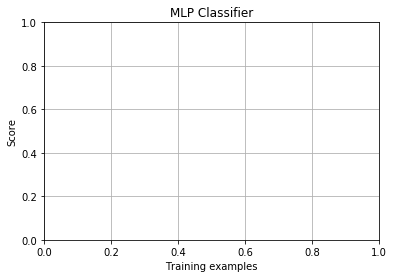

In [175]:
# Learning curve (in progress)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
plot_learning_curve(MLP, "MLP Classifier", features, target)
plt.show()